# Implementing Linear Regression to Predict House Prices In Melbourne, Australia


# • Home Price Ranges are in Australian Dollars.

# • Area is measured in squared meters.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [77]:
data = pd.read_excel('Melbourne Housing Pricing.xlsx')

In [78]:
df = pd.DataFrame(data)

In [79]:
df = df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']]

In [80]:
df.rename(columns = {'Bedroom2': 'Bedrooms', 'Bathroom': 'Bathrooms', 'Car': 'Car Spots', 'Propertycount': 'PropertiesInSuburb', 'Distance': 'DistanceFromCBD'}, inplace = True)

__Using a Box Plot to visual the distribution of house prices.__

__We will remove outliers for more accurate calculations.__

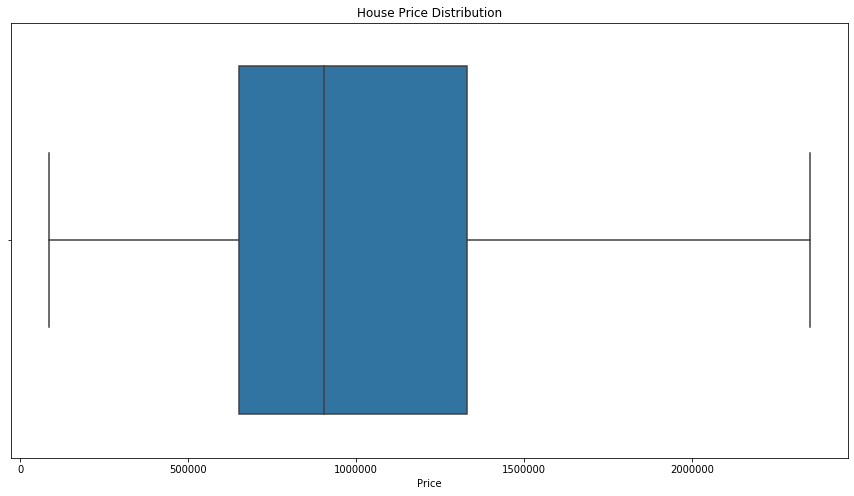

In [81]:
plt.figure(figsize = (15,8))
plt.title('House Price Distribution')
sns.boxplot(df['Price'], showfliers = False)
plt.show()

__Removing the Outliers from the Price Distribution, for more accurate predictions.__

In [82]:
outlier_remove = df['Price'].quantile(0.95)

In [83]:
df = df.where(df['Price'] <= outlier_remove).dropna()

In [84]:
df.head()

,Rooms,Price,DistanceFromCBD,Bedrooms,Bathrooms,Car Spots,Landsize,PropertiesInSuburb
0,2.0,1480000.0,2.5,2.0,1.0,1.0,202.0,4019.0
1,2.0,1035000.0,2.5,2.0,1.0,0.0,156.0,4019.0
2,3.0,1465000.0,2.5,3.0,2.0,0.0,134.0,4019.0
3,3.0,850000.0,2.5,3.0,2.0,1.0,94.0,4019.0
4,4.0,1600000.0,2.5,3.0,1.0,2.0,120.0,4019.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12842 entries, 0 to 13579
Data columns (total 8 columns):
Rooms                 12842 non-null float64
Price                 12842 non-null float64
DistanceFromCBD       12842 non-null float64
Bedrooms              12842 non-null float64
Bathrooms             12842 non-null float64
Car Spots             12842 non-null float64
Landsize              12842 non-null float64
PropertiesInSuburb    12842 non-null float64
dtypes: float64(8)
memory usage: 903.0 KB


In [86]:
df.describe()

,Rooms,Price,DistanceFromCBD,Bedrooms,Bathrooms,Car Spots,Landsize,PropertiesInSuburb
count,12842.000000,1.284200e+04,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.00000
mean,2.882573,9.746093e+05,10.272582,2.860925,1.485127,1.578415,515.942143,7456.46161
std,0.927264,4.453928e+05,5.944379,0.939308,0.638903,0.944019,1499.878172,4434.76421
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,249.00000
25%,2.000000,6.350000e+05,6.300000,2.000000,1.000000,1.000000,168.000000,4280.00000
50%,3.000000,8.765000e+05,9.400000,3.000000,1.000000,2.000000,416.000000,6543.00000
75%,3.000000,1.260000e+06,13.000000,3.000000,2.000000,2.000000,644.000000,10331.00000
max,10.000000,2.290000e+06,48.100000,20.000000,8.000000,10.000000,76000.000000,21650.00000


__Using a heatmap to visualize the correlations with each of the variables.__

__The strongest correlation with price is the variable - Rooms; with a correlation of 0.49.__

__The following attributes that have strong correlations to Price:__

__• Bedrooms__

__• Bathrooms__

__• Car Spots__

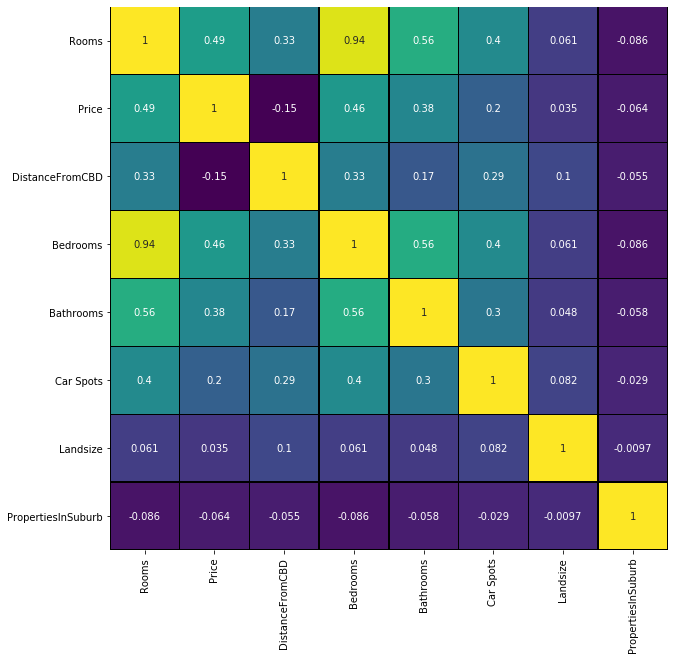

In [87]:
plt.figure(figsize = (10,10))
x = sns.heatmap(df.corr(), linewidths = 0.5, linecolor = 'black', cmap = 'viridis', annot = True, cbar = False)
x.set_ylim(sorted(x.get_xlim(), reverse=True))
plt.show()

In [88]:
filterdata = ['Rooms', 'Bedrooms', 'Bathrooms', 'Car Spots']

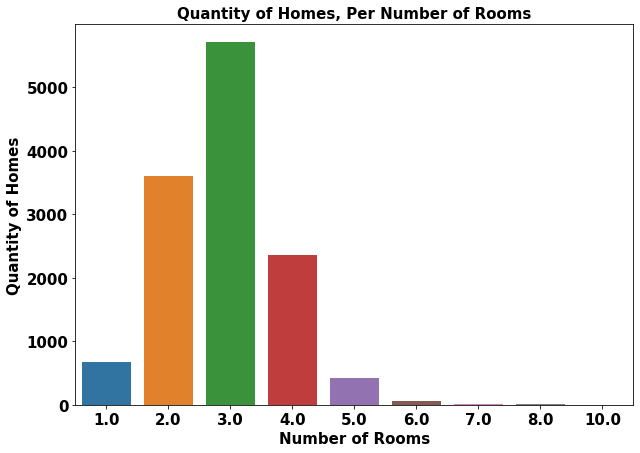

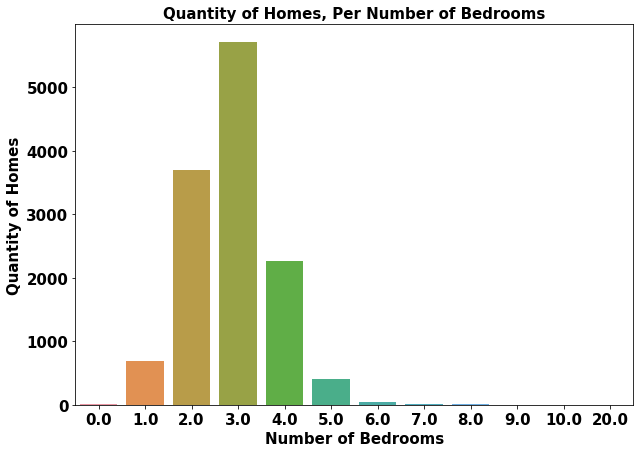

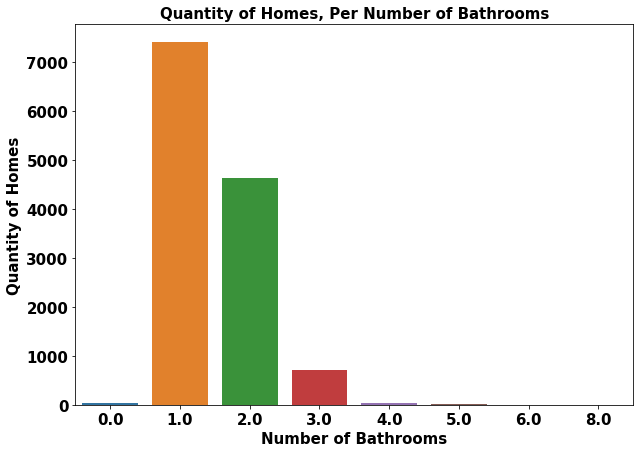

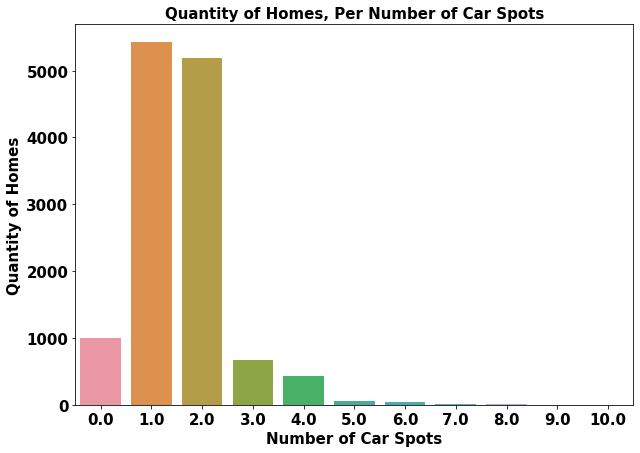

In [89]:
i = 0

while i < len(filterdata):
    plt.figure(figsize = (10,7))
    sns.countplot(data = df, x = filterdata[i])
    plt.title(f'Quantity of Homes, Per Number of {filterdata[i]}', size = 15, weight = 'bold')
    plt.ylabel('Quantity of Homes', size = 15, weight = 'bold')
    plt.xlabel(f'Number of {filterdata[i]}', size = 15, weight = 'bold')
    plt.yticks(size = 15, weight = 'bold')
    plt.xticks(size = 15, weight = 'bold')
    i += 1

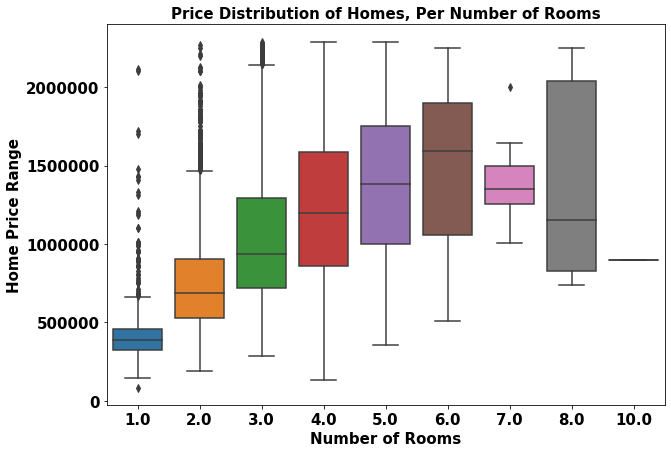

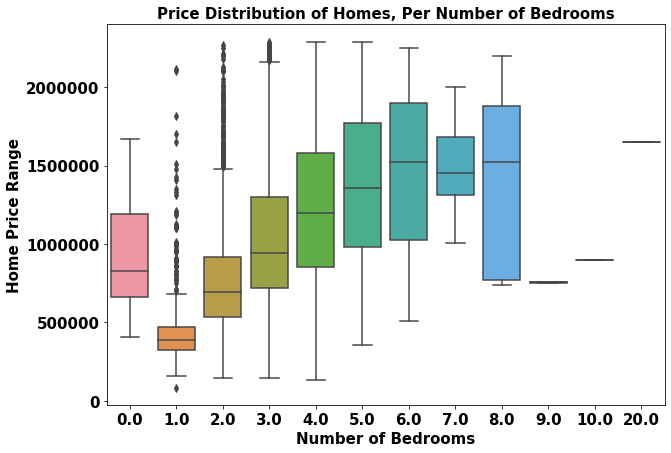

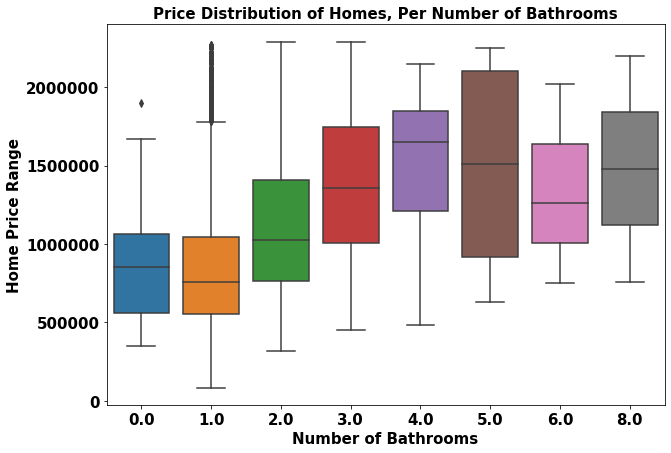

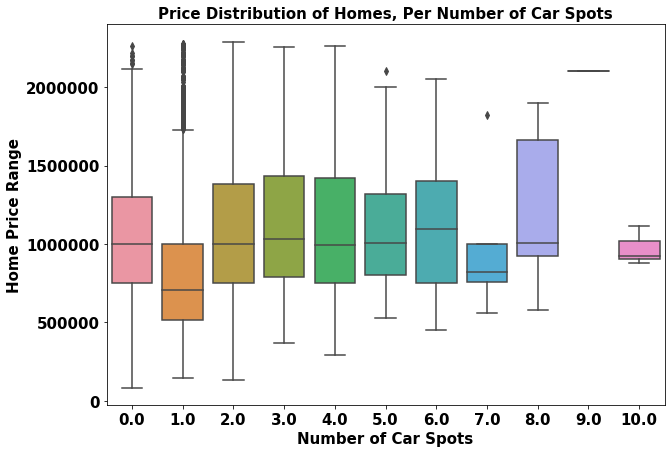

In [90]:
i = 0

while i < len(filterdata):
    plt.figure(figsize = (10,7))
    sns.boxplot(data = df, x = filterdata[i], y = 'Price')
    plt.title(f'Price Distribution of Homes, Per Number of {filterdata[i]}', size = 15, weight = 'bold')
    plt.ylabel('Home Price Range', size = 15, weight = 'bold')
    plt.xlabel(f'Number of {filterdata[i]}', size = 15, weight = 'bold')
    plt.yticks(size = 15, weight = 'bold')
    plt.xticks(size = 15, weight = 'bold') 
    i += 1

__The following joint plot is demonstrating there is a small negative correlation between the House Price and the Quantity of Housing in the Suburban Area.__

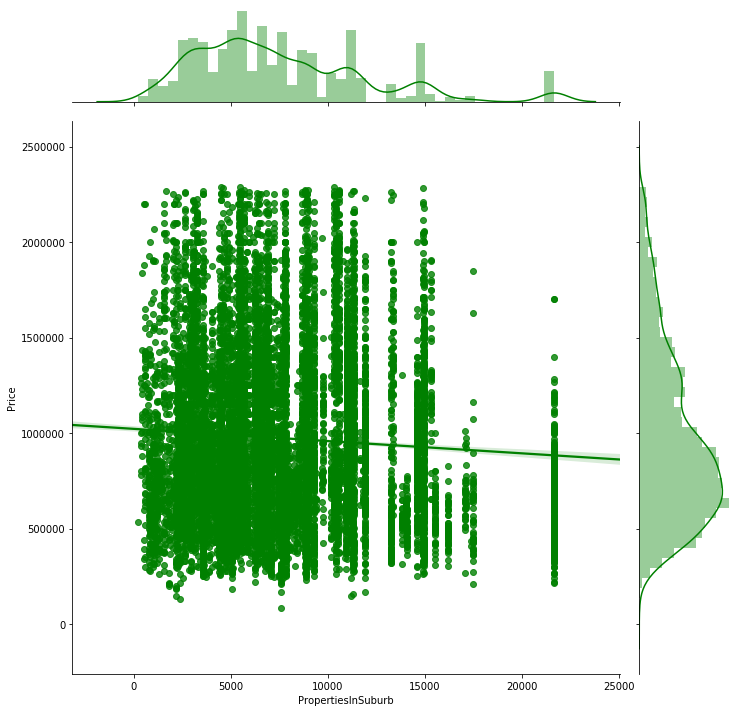

In [91]:
sns.jointplot(data = df, x = 'PropertiesInSuburb', y = 'Price', kind = 'reg', color = 'green', height = 10)
plt.show()

__Splitting and Training the Data.__

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x = df.drop('Price', axis = 1)

In [94]:
y = df['Price']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 101)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm = LinearRegression()

In [98]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
lm.coef_

array([ 1.92338618e+05, -2.61175756e+04,  4.47103759e+04,  9.07659662e+04,
        2.96691061e+04,  8.13901233e+00, -2.31285975e+00])

In [100]:
cdf = pd.DataFrame(lm.coef_,x.columns, columns = ['Coeff'])

In [101]:
round(cdf, 2)

,Coeff
Rooms,192338.62
DistanceFromCBD,-26117.58
Bedrooms,44710.38
Bathrooms,90765.97
Car Spots,29669.11
Landsize,8.14
PropertiesInSuburb,-2.31


__Predicting Future Housing Prices__

In [102]:
predictions = lm.predict(x_test)

In [103]:
len(predictions)

5137

In [104]:
from sklearn.model_selection import cross_val_predict

In [105]:
predicted = cross_val_predict(lm, x, y, cv=10)

__The Correlation Between the Test Housing Prices and Future Housing Prices Needs to be close to 1, for accurate Housing Predicition.__

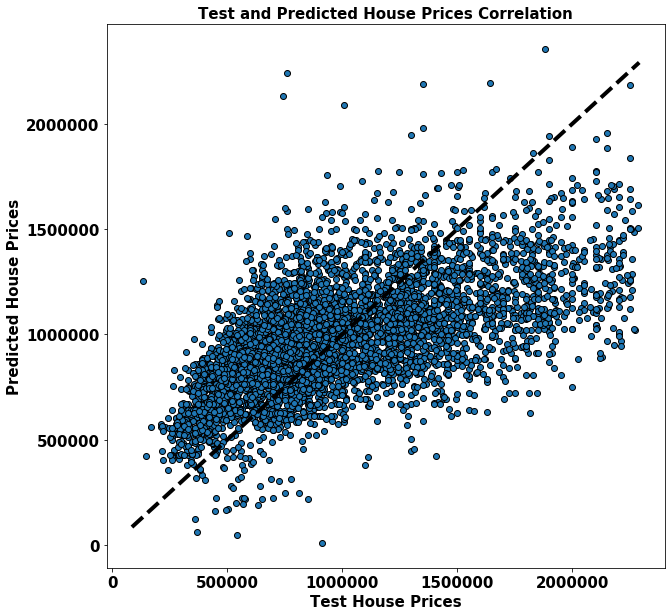

In [106]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, predictions, edgecolors = (0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw = 4)
plt.title('Test and Predicted House Prices Correlation', size = 15, weight = 'bold')
plt.ylabel('Predicted House Prices', size = 15, weight = 'bold')
plt.xlabel('Test House Prices', size = 15, weight = 'bold')
plt.xticks(size = 15, weight = 'bold')
plt.yticks(size = 15, weight = 'bold')
plt.show()

__Even Distribution of R - Values are Needed, to accurately predict Housing Prices.__

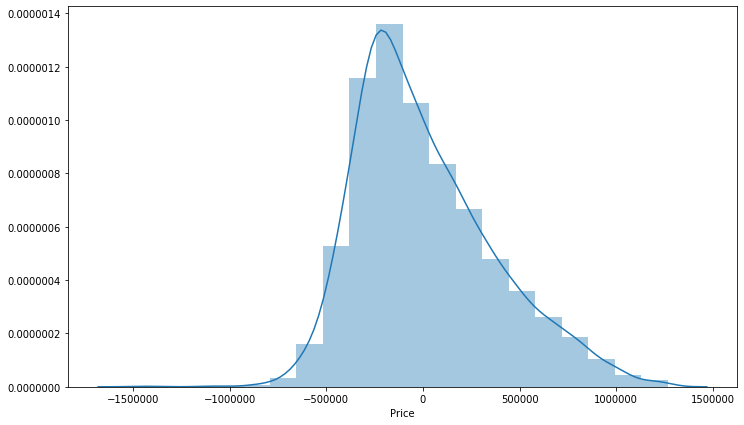

In [137]:
plt.figure(figsize = (12,7))
sns.distplot((y_test-predictions), bins=20)
plt.show()

In [108]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coefficient']
round(coeffecients.sort_values('Coefficient', ascending = True),2)

,Coefficient
DistanceFromCBD,-26117.58
PropertiesInSuburb,-2.31
Landsize,8.14
Car Spots,29669.11
Bedrooms,44710.38
Bathrooms,90765.97
Rooms,192338.62


In [109]:
lm.intercept_

387340.5955564348

In [131]:
Distance_From_Central_Business_District = 2.5
Number_of_Properties_in_Suburban_Area = 4000
Landsize_of_Property = 200
Car_Spots_Available = 2
Number_of_Bedrooms = 3
Number_of_Bathrooms = 2
Number_of_Rooms = 9

In [132]:
calc = coeffecients.loc[['DistanceFromCBD'][0]] * Distance_From_Central_Business_District + coeffecients.loc[['PropertiesInSuburb'][0]] * Number_of_Properties_in_Suburban_Area + coeffecients.loc[['Landsize'][0]] * Landsize_of_Property + coeffecients.loc[['Car Spots'][0]] * Car_Spots_Available + coeffecients.loc[['Bedrooms'][0]] * Number_of_Bedrooms + coeffecients.loc[['Bathrooms'][0]] * Number_of_Bathrooms + coeffecients.loc[['Rooms'][0]] * Number_of_Rooms + lm.intercept_

In [133]:
print(f'Home Price Prediction: ${round(calc[[0][0]],2)}.')

Home Price Prediction: $2420471.85.
